## RNN on a Sine Wave

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

-------------------------------------------------------------------------------------------------------------------------------

### 1) Data

* Let's use Numpy to create a simple Sine Wave

In [2]:
x = np.linspace(0,50, 501)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y = np.sin(x)

In [5]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

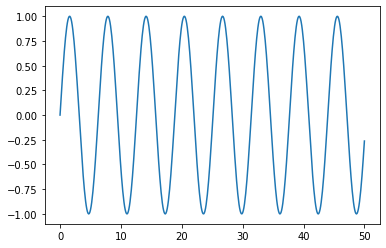

In [6]:
plt.plot(x,y)

In [7]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [8]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


### Train/Test Split

* Very different for Forecasting

In [9]:
len(df)

501

##### How much percent from train_data to be test_data

In [10]:
test_percent = 0.1

In [11]:
len(df)*test_percent

50.1

##### So there will be 50 data points in our test_data

In [12]:
test_point = np.round(len(df)*test_percent)

In [13]:
test_point

50.0

##### Selecting the cut-off point or at what index_position we are seperating test_data from training_data

In [14]:
test_ind = int(len(df) - test_point)

`We used int so that we can use for indexing for pandas`

In [15]:
train = df.iloc[:test_ind]

test = df.iloc[test_ind:]

In [16]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [17]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


### Scaling the Data

* Here we have to scale the y (label) as well, because RNN will feed back this output again to the neurons

* In previous Neural Networks we haven't scaled the labelled data

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaled_train = scaler.fit_transform(train)

scaled_test = scaler.transform(test)

-------------------------------------------------------------------------------------------------------------------------------

### 2) Batch Generator

* Now let's take our training data and `create batches` for the training processes off of it

### `Time Series Generator`

* So this class creates batches for the sequence data

`Arguments :`

* data : Actual source of the (X)

* targets : source of the label

`In our current case, both data and targets are of same source i.e., we are using training data for both of them because we have time-stamped sequence information`

* length : length of the output sequence (no.of time-steps)

* batch_size : no.of time-series samples in each batch

In [21]:
#help(TimeseriesGenerator)

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
length = 2

batch_size = 1

##### Basically if we give the index (X) to the model, it should predict the label (Y) i.e., sine value

* Since our scaled_train contains both X(index) and Y(label) it the source of the data for the both

In [24]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [25]:
len(scaled_train)

451

In [26]:
len(generator)   # here n_inputs = 2  (length)

449

##### So, let's see what does the first batch looks like?

In [27]:
X, y = generator[0]

In [28]:
X

array([[[0.49999912],
        [0.54991622]]])

In [29]:
y

array([[0.59933458]])

In [30]:
scaled_train     # so the third value is correct

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


##### `So given the two inputs of X, the model is going to predict the next point i.e., third point and which is y`

**The length should not be an arbitrary choice, the length X should be enough for the network to pick up any seasonality or repeating effects**

##### So let's choose the length to be 25 and see how len(generator) changes

In [31]:
length = 25    # Let's go 25 steps back and predict the next step out

batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [32]:
X, y = generator[0]

In [33]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [34]:
y

array([[0.79923759]])

##### Now we have 500 data points and it takes almost over 5 ( not data points, x-axis of almost 5 ) to complete one full cycle and hence let's take length to be 50 

In [40]:
length = 50

batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [41]:
X, y = generator[0]

In [42]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [43]:
y

array([[0.02053313]])

-------------------------------------------------------------------------------------------------------------------------------

### 3) Create the Model

In [44]:
from tensorflow.keras.models import Sequential

In [45]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [46]:
# Here we are using only one feature that is gonna predict Y in our case it's just index(X)

n_features = 1

In [47]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(length, n_features)))

'''
no.of neurons = length 
'''

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit_generator(generator, epochs=5)

Epoch 1/5
401/401 [==============================] - 15s 38ms/step - loss: 0.0029
Epoch 2/5
401/401 [==============================] - 15s 37ms/step - loss: 5.5776e-05
Epoch 3/5
401/401 [==============================] - 15s 37ms/step - loss: 4.4559e-04
Epoch 4/5
401/401 [==============================] - 15s 37ms/step - loss: 4.6073e-05
Epoch 5/5
401/401 [==============================] - 15s 37ms/step - loss: 1.9697e-05


In [50]:
losses = pd.DataFrame(model.history.history)

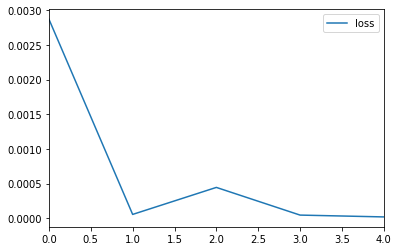

In [51]:
losses.plot()

### `Evaluate on the Test Data`

* Let's imagine what is the first batch I should be passing into the model to predict something on the test_set

In [52]:
first_eval_batch = scaled_train[-length:]

**Here we are taking the last 50 points from our training set to predict one point in the future which is the very first point in the test set**

In [53]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


##### In order to pass them into the model we need to reshape it to what the model expects to get into it 

In [54]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [55]:
model.predict(first_eval_batch)

array([[0.947551]], dtype=float32)

In [56]:
scaled_test[0]

array([0.94955134])

* `Because we are actually predicting on scaled test_data`

**We will need to keep moving essentially 25 points and as we keep predicting we will add an additional predicted point until we are forecasting off predictions**

##### `Now let's put this logic in a for loop to predict into the future for the entire test range `

In [57]:
test_predictions = []

first_eval_batch = scaled_train[-length:]

current_batch = first_eval_batch.reshape((1, length, n_features))

In [58]:
first_eval_batch.shape

(50, 1)

In [59]:
current_batch.shape

(1, 50, 1)

In [60]:
current_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

**Now I have to replace the first value of current_batch with the new predicted value at the end of it and we should keep moving forward by replacing the very first value of the current_batch every time with the new predicted value at the end of it**

In [63]:
# np.append(current_batch[:, 1:, :], [[[99]]], axis=1)  # to just show how it is updating one single time

##### The reaosn for [[[99]]] is predicted value format of model.predict is in two arrays braces and we need to add one extra braces for appending

In [64]:
test_predictions = []

first_eval_batch = scaled_train[-length:]

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [65]:
test_predictions

[array([0.947551], dtype=float32),
 array([0.9660487], dtype=float32),
 array([0.9803921], dtype=float32),
 array([0.9897105], dtype=float32),
 array([0.9942627], dtype=float32),
 array([0.99394], dtype=float32),
 array([0.9893384], dtype=float32),
 array([0.97997296], dtype=float32),
 array([0.9654796], dtype=float32),
 array([0.9465038], dtype=float32),
 array([0.92294675], dtype=float32),
 array([0.8951103], dtype=float32),
 array([0.86323327], dtype=float32),
 array([0.82762897], dtype=float32),
 array([0.7886837], dtype=float32),
 array([0.7468139], dtype=float32),
 array([0.7029838], dtype=float32),
 array([0.6571732], dtype=float32),
 array([0.6098099], dtype=float32),
 array([0.56150496], dtype=float32),
 array([0.51275605], dtype=float32),
 array([0.4637862], dtype=float32),
 array([0.41469318], dtype=float32),
 array([0.36633047], dtype=float32),
 array([0.3190595], dtype=float32),
 array([0.27304244], dtype=float32),
 array([0.22873889], dtype=float32),
 array([0.18679243], 

##### Now let's compare with the actual scaled_test data

In [66]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


### `Inverse Transformations and Compare`

In [67]:
true_predictions = scaler.inverse_transform(test_predictions)

In [68]:
true_predictions

array([[ 0.89509661],
       [ 0.93209172],
       [ 0.96077825],
       [ 0.97941493],
       [ 0.98851923],
       [ 0.98787383],
       [ 0.97867071],
       [ 0.95993998],
       [ 0.93095352],
       [ 0.89300224],
       [ 0.84588848],
       [ 0.79021604],
       [ 0.72646247],
       [ 0.65525445],
       [ 0.57736456],
       [ 0.49362559],
       [ 0.4059661 ],
       [ 0.31434568],
       [ 0.21961976],
       [ 0.1230107 ],
       [ 0.02551366],
       [-0.07242522],
       [-0.17061051],
       [-0.26733514],
       [-0.36187635],
       [-0.45390971],
       [-0.5425161 ],
       [-0.62640834],
       [-0.70429561],
       [-0.77601879],
       [-0.84051437],
       [-0.89586248],
       [-0.9419863 ],
       [-0.97834586],
       [-1.00438564],
       [-1.01962885],
       [-1.02407336],
       [-1.01834486],
       [-1.00227644],
       [-0.97640236],
       [-0.94163178],
       [-0.89786674],
       [-0.84579462],
       [-0.78623921],
       [-0.71954345],
       [-0

In [69]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [70]:
test['Predictions'] = true_predictions

c:\users\tvnsk\anaconda3x\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
test

,Sine,Predictions
45.1,0.899097,0.895097
45.2,0.938307,0.932092
45.3,0.968142,0.960778
45.4,0.988304,0.979415
45.5,0.998591,0.988519
45.6,0.998900,0.987874
45.7,0.989229,0.978671
45.8,0.969673,0.959940
45.9,0.940429,0.930954
46.0,0.901788,0.893002


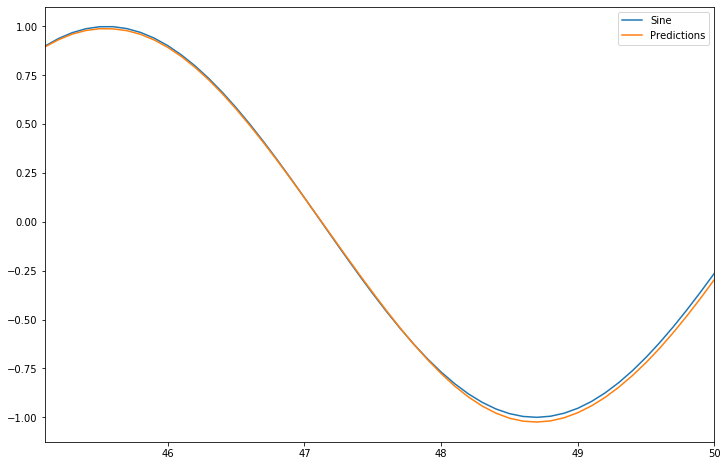

In [72]:
test.plot(figsize=(12,8))

##### Notice that as we are predicting further and further into the future, our values are getting further and further off because we are predicting off predictions 

##### So that very first point of the plot is the most accurate because we are using real data(those last 25 training points) to predict the first point into the test set 

##### As we move to the next point we have 24 real training points and one predicted point...........

##### So we will reach the true forecasting i.e., complete forecasted values at the very end

-----------------------------------------------------------------------------------------------------------------------------

### Early Stopping and Validation Generator

In [73]:
from tensorflow.keras.callbacks import EarlyStopping

In [74]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [75]:
length = 49

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

**The reason why we used length = 49 is because the length of the batch should be atleast one shorter than the test data(scaled_test)**

**Or else we will be missing that predicted point i.e., we will use 49 points of the batch to predict one point in the future into the test_set and hence it will throw an error**

-------------------------------------------------------------------------------------------------------------------------------

### LSTMS


* `Let's see how we can improve the performance with LSTM unit`

In [76]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [77]:
model.fit_generator(generator, validation_data=validation_generator, epochs=20, callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 29s 72ms/step - loss: 0.0118 - val_loss: 4.2149e-06
Epoch 2/20
402/402 [==============================] - 27s 67ms/step - loss: 1.7295e-04 - val_loss: 1.9607e-04
Epoch 3/20
402/402 [==============================] - 27s 68ms/step - loss: 1.4116e-04 - val_loss: 3.8757e-05


### Evaluation on the test_set

In [78]:
test_predictions = []

first_eval_batch = scaled_train[-length:]

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [79]:
true_predictions = scaler.inverse_transform(test_predictions)

test['LSTM Predictions'] = true_predictions

c:\users\tvnsk\anaconda3x\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


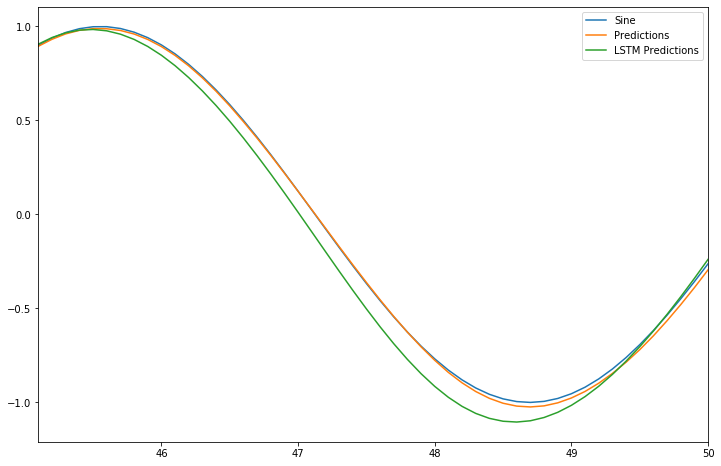

In [80]:
test.plot(figsize=(12,8))

##### It looks like our LSTM predictions are further off in the middle but they are almost perfect at the very end with the actual sine wave

-------------------------------------------------------------------------------------------------------------------------------

## Forecasting

* `Let's forecast into the future (unknown range)`

**Recall our original data (df) goes upto only 50. Now let's imagine I want to actually forecast this beyond 50**

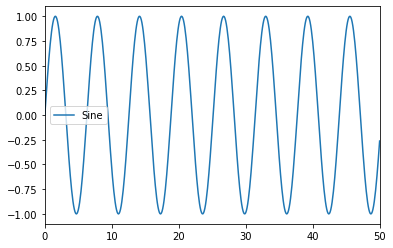

In [83]:
df.plot()

##### Since we are forecasting the unknown range we have to utilize all the data

In [84]:
full_scaler = MinMaxScaler()

In [85]:
scaled_full_data = full_scaler.fit_transform(df)

In [86]:
length = 50

generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [87]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [88]:
model.fit_generator(generator, epochs=6)

Epoch 1/6
451/451 [==============================] - 30s 67ms/step - loss: 0.0089
Epoch 2/6
451/451 [==============================] - 35s 77ms/step - loss: 2.2070e-04
Epoch 3/6
451/451 [==============================] - 35s 78ms/step - loss: 2.2751e-04
Epoch 4/6
451/451 [==============================] - 35s 77ms/step - loss: 2.7588e-04
Epoch 5/6
451/451 [==============================] - 32s 70ms/step - loss: 1.2434e-04
Epoch 6/6
451/451 [==============================] - 31s 69ms/step - loss: 5.5771e-05


In [93]:
forecast = []

first_eval_batch = scaled_full_data[-length:]

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    '''Here length of test = 50 i.e.,
    
        I have predicted 50 points into the future'''
    
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [94]:
forecast = scaler.inverse_transform(forecast)

In [95]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [96]:
len(forecast)

50

In [98]:
forecast

array([[-0.15876978],
       [-0.05548762],
       [ 0.04964906],
       [ 0.15572755],
       [ 0.26178053],
       [ 0.36678006],
       [ 0.46964863],
       [ 0.56927508],
       [ 0.66453625],
       [ 0.75432253],
       [ 0.837565  ],
       [ 0.91326539],
       [ 0.98051892],
       [ 1.03853761],
       [ 1.08666488],
       [ 1.12438549],
       [ 1.1513292 ],
       [ 1.16726807],
       [ 1.17210888],
       [ 1.16588287],
       [ 1.1487307 ],
       [ 1.12089293],
       [ 1.08268928],
       [ 1.03451362],
       [ 0.97681964],
       [ 0.91011877],
       [ 0.83497114],
       [ 0.75199118],
       [ 0.66184631],
       [ 0.56526265],
       [ 0.46303018],
       [ 0.35600947],
       [ 0.24513475],
       [ 0.13141465],
       [ 0.01592681],
       [-0.10019212],
       [-0.21576728],
       [-0.32961303],
       [-0.44055981],
       [-0.54748631],
       [-0.64934009],
       [-0.7451483 ],
       [-0.83401455],
       [-0.91510317],
       [-0.98762244],
       [-1

##### Now I have to provide index to actually know what these values refer to with the original data

In [99]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


##### Now the original data goes up to 50 points now the `new data or forecasted data` will start from 50.1

In [100]:
50*0.1

5.0

In [101]:
forecast_index = np.arange(50.1, 55.1, step=0.1)

In [102]:
len(forecast_index)

50

In [103]:
len(forecast)

50

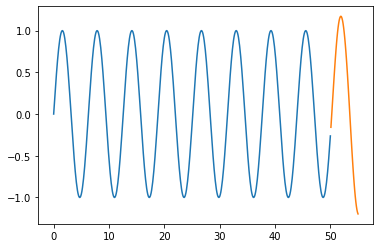

In [104]:
plt.plot(df.index, df['Sine'])

plt.plot(forecast_index, forecast)

##### Now we could see the new 50 points in the future have been predicted 

##### The reason for the gap in between is `df and forecast are two different Pandas Series` and we can make them continuous without any gaps with pd.conact(df.index, forecast_index)